In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [17]:
import pandas as pd
import numpy as np
import mpslib as mps
import matplotlib.pyplot as plt

from scripts.utils import plot_realizations_enhanced

# Setup MPSLib

In [3]:
simulation_number = 0
simulation_grid_size = [250, 250, 1]

In [4]:
# Initialize MPSlib using default algortihm, and seetings
O = mps.mpslib()

# O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=simulation_grid_size)
# O.par["rseed"] = 1
# O.par["template_size"] = np.array([8, 7, 1])
# O.par["out_folder"] = f"../data/simulated/simulation_{simulation_number}/"
# O.par['n_cond']=25  # Number of neighbors necessary
# O.par['n_real']=16  # Number of realizations
# O.par['n_threads']=9
# O.par["n_max_cpdf_count"] = 1
# O.par['do_entropy'] = 1   # 1 Calculates the entropy

# O.par["shuffle_simulation_grid"] = 2
# O.par["n_multiple_grids"] = 3
# O.par['simulation_grid_size']=np.array(simulation_grid_size)
# O.par["debug_level"] = 1
# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]

O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=simulation_grid_size)

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=10
O.par['n_real']=25
O.par['n_threads']=10
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array(simulation_grid_size)

Using mps_genesim installed in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/bin (scikit-mps in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/mpslib.py)
Using mps_snesim_tree installed in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/bin (scikit-mps in /home/pedro2/.local/lib/python3.10/site-packages/mpslib/mpslib.py)


# Choose training image

In [5]:
idx = 4

path = f"../data/eas/Parker_binary_{idx}"
path_eas = path + ".dat"
data_eas = mps.eas.read(filename=path_eas)
data_array = np.load(path + ".npy")
data_transformed_array = np.load(path + "_transformed.npy")

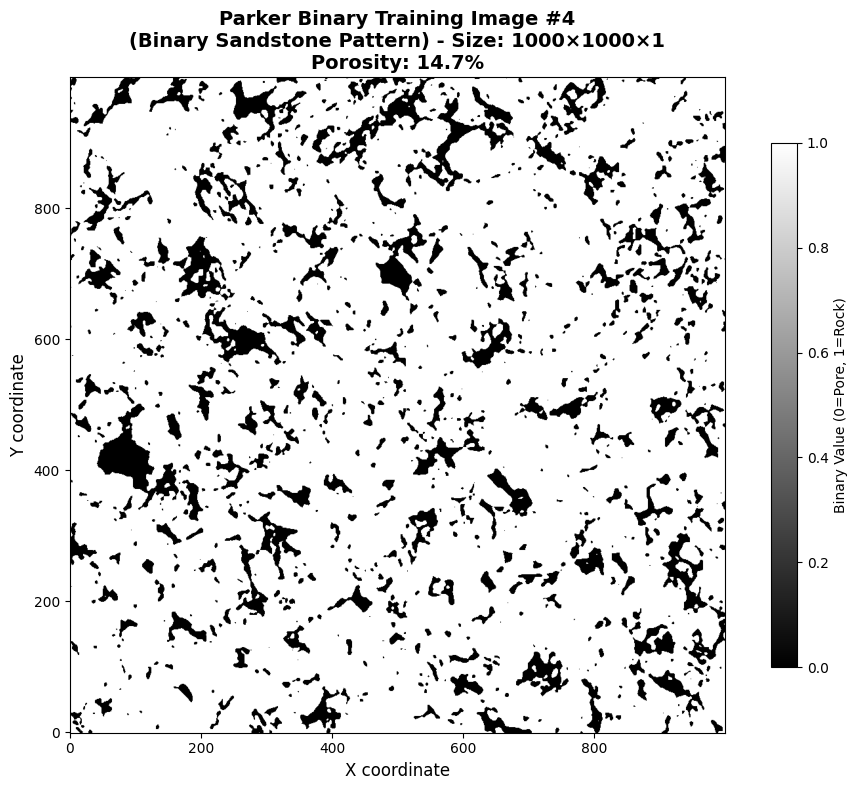

In [6]:
# Calculate porosity (percentage of pore space, where 0=Pore, 1=Rock)
porosity = np.mean(data_array[:,:,0] == 0) * 100

# Create a larger, better formatted plot
plt.figure(figsize=(10, 8))
plt.imshow(data_array[:,:,0].T, cmap='gray', origin='lower')
plt.title(f'Parker Binary Training Image #{idx}\n(Binary Sandstone Pattern) - Size: {data_array.shape[0]}×{data_array.shape[1]}×{data_array.shape[2]}\nPorosity: {porosity:.1f}%', fontsize=14, fontweight='bold')
plt.xlabel('X coordinate', fontsize=12)
plt.ylabel('Y coordinate', fontsize=12)
plt.colorbar(label='Binary Value (0=Pore, 1=Rock)', shrink=0.8)
plt.tight_layout()
plt.show()


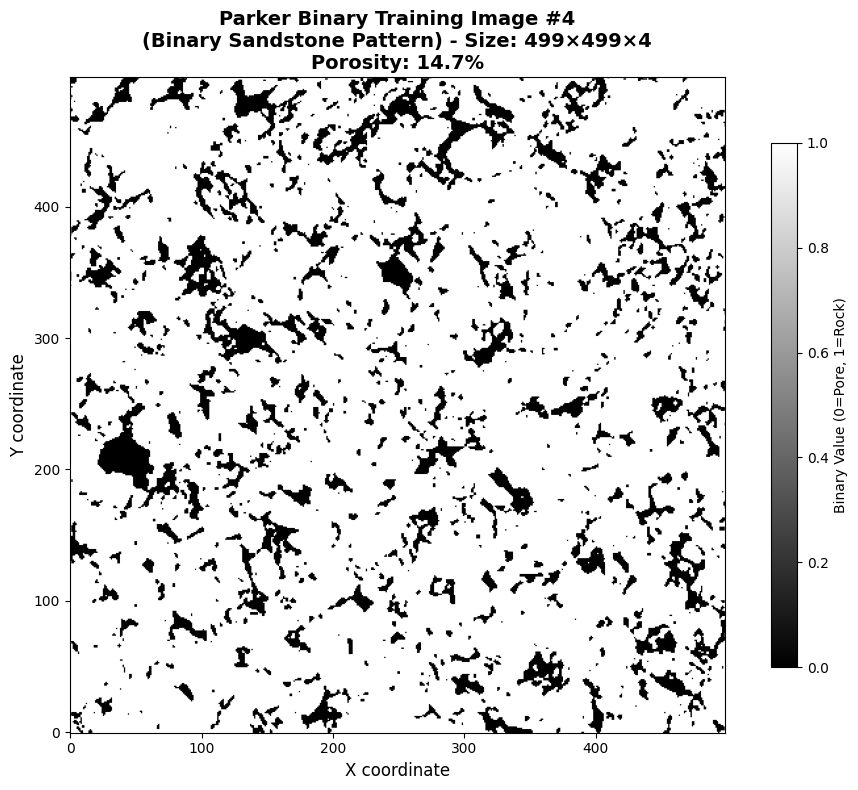

In [7]:
# Calculate porosity (percentage of pore space, where 0=Pore, 1=Rock)
porosity = np.mean(data_transformed_array[:,:,0] == 0) * 100

# Create a larger, better formatted plot
plt.figure(figsize=(10, 8))
plt.imshow(data_transformed_array[:,:,0].T, cmap='gray', origin='lower')
plt.title(f'Parker Binary Training Image #{idx}\n(Binary Sandstone Pattern) - Size: {data_transformed_array.shape[0]}×{data_transformed_array.shape[1]}×{data_transformed_array.shape[2]}\nPorosity: {porosity:.1f}%', fontsize=14, fontweight='bold')
plt.xlabel('X coordinate', fontsize=12)
plt.ylabel('Y coordinate', fontsize=12)
plt.colorbar(label='Binary Value (0=Pore, 1=Rock)', shrink=0.8)
plt.tight_layout()
plt.show()


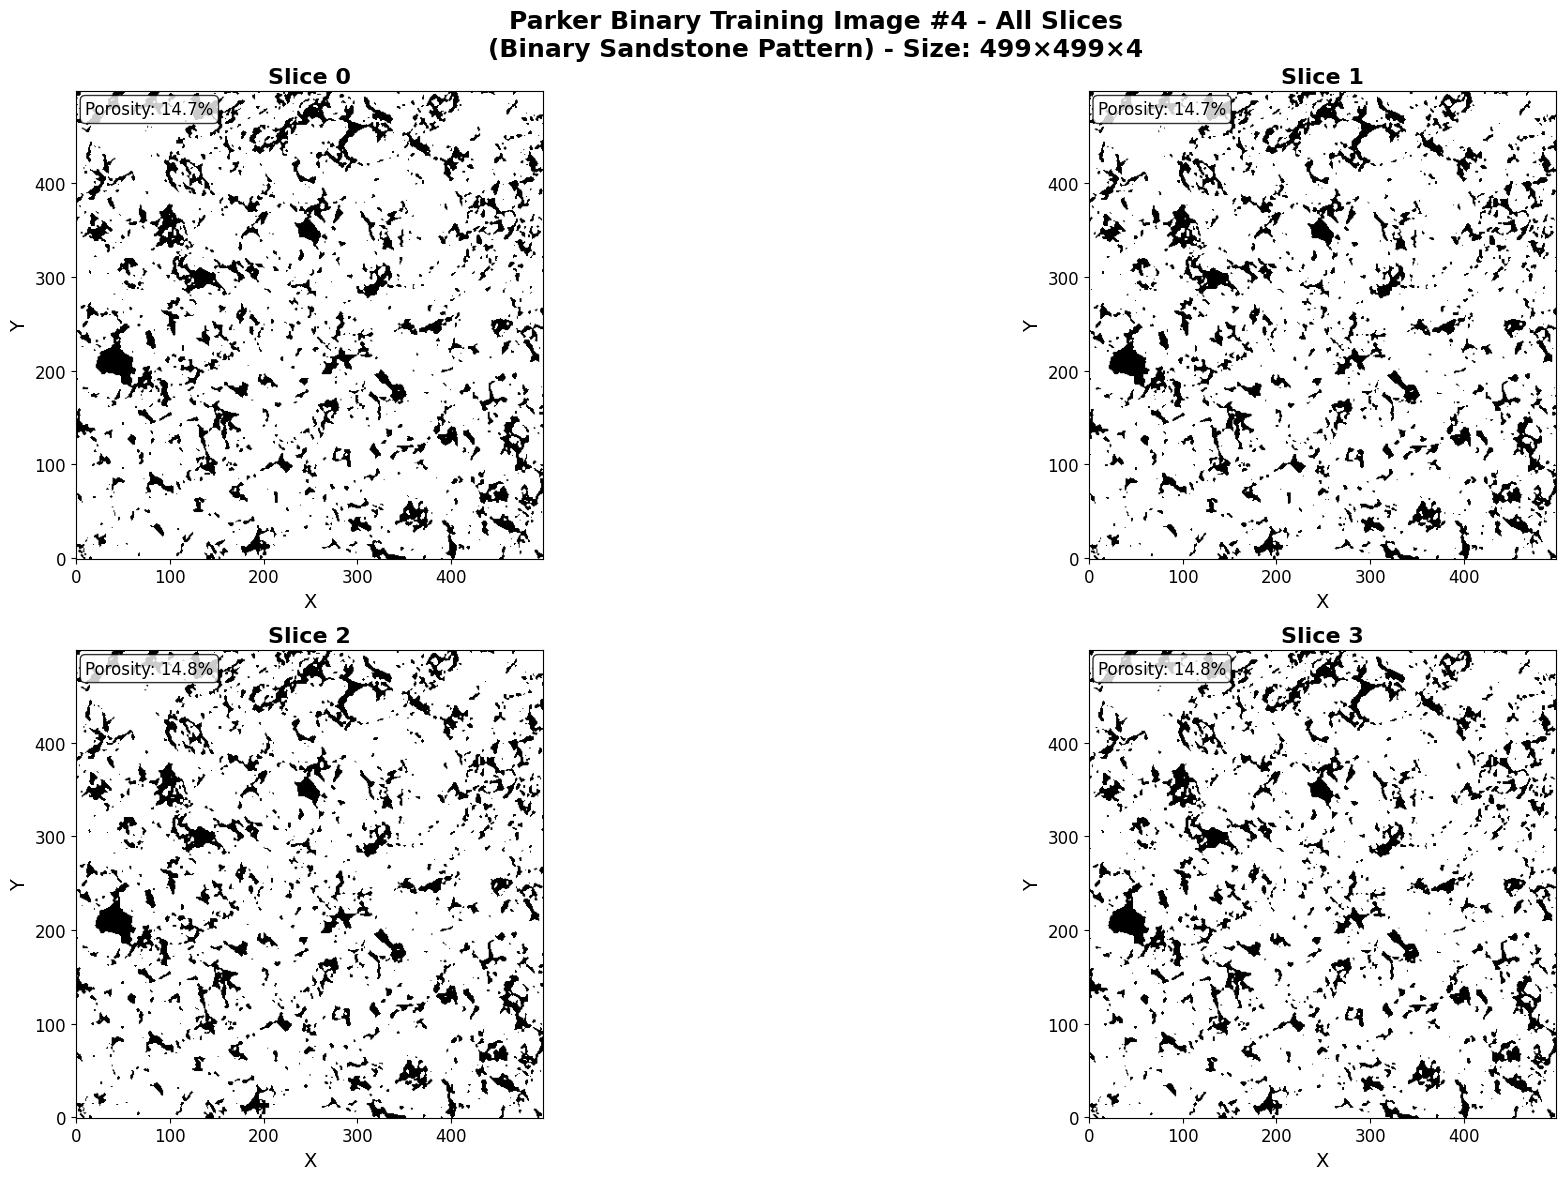

In [8]:
# Plot all slices in a grid with 2 images per row for better visibility
n_slices = data_transformed_array.shape[2]
cols = 2  # Fixed 2 columns per row
rows = (n_slices + cols - 1) // cols  # Calculate rows needed

plt.figure(figsize=(12*cols, 6*rows))  # Large figure size with 2 columns
for i in range(n_slices):
    plt.subplot(rows, cols, i+1)
    plt.imshow(data_transformed_array[:,:,i].T, cmap='gray', origin='lower')
    plt.title(f'Slice {i}', fontsize=16, fontweight='bold')
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add statistics to help identify differences
    unique_vals = np.unique(data_transformed_array[:,:,i])
    porosity = np.mean(data_transformed_array[:,:,i] == 0) * 100
    plt.text(0.02, 0.98, f'Porosity: {porosity:.1f}%', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle(f'Parker Binary Training Image #{idx} - All Slices\n(Binary Sandstone Pattern) - Size: {data_transformed_array.shape[0]}×{data_transformed_array.shape[1]}×{data_transformed_array.shape[2]}', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


# Simulation and parameters

In [9]:
O.par['ti_fnam'] = path + ".dat"

In [10]:
O.par

{'n_real': 25,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': '../data/eas/Parker_binary_4.dat',
 'simulation_grid_size': array([250, 250,   1]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': 10,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 1,
 'template_size': array([8, 7, 1]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 10}

In [11]:
O.run_parallel()

parallel: Using 9 of max 10 threads


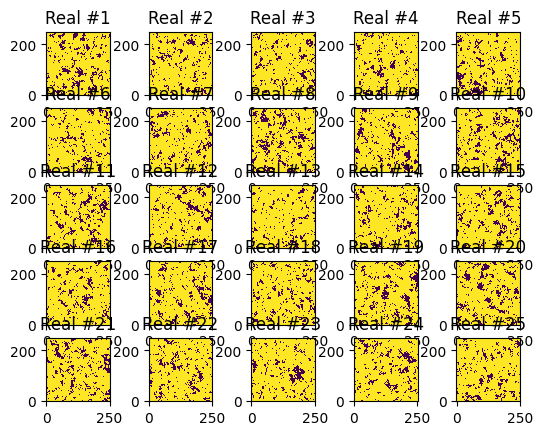

In [12]:
O.plot_reals()

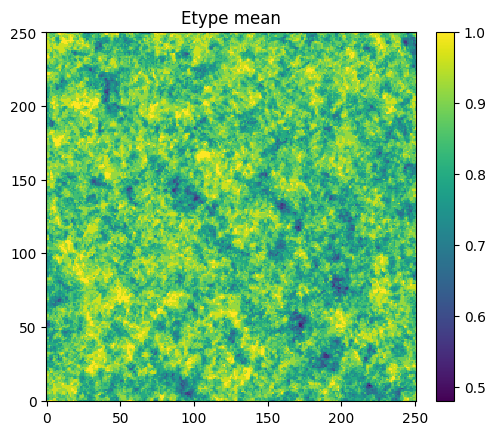

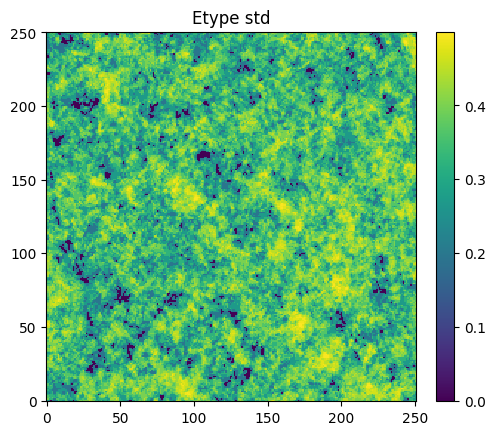

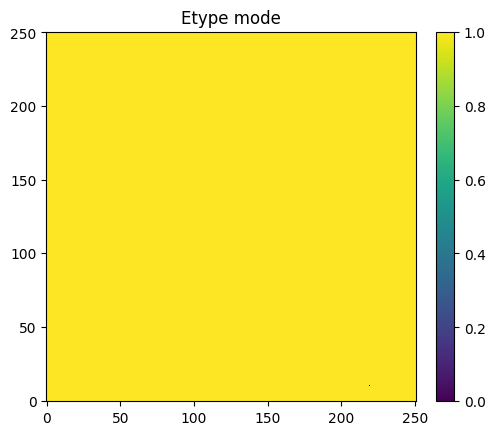

In [13]:
O.plot_etype()

/home/pedro2/Documents/GitHub/multi-point-statistics/scripts/utils.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Plot saved to: results.png


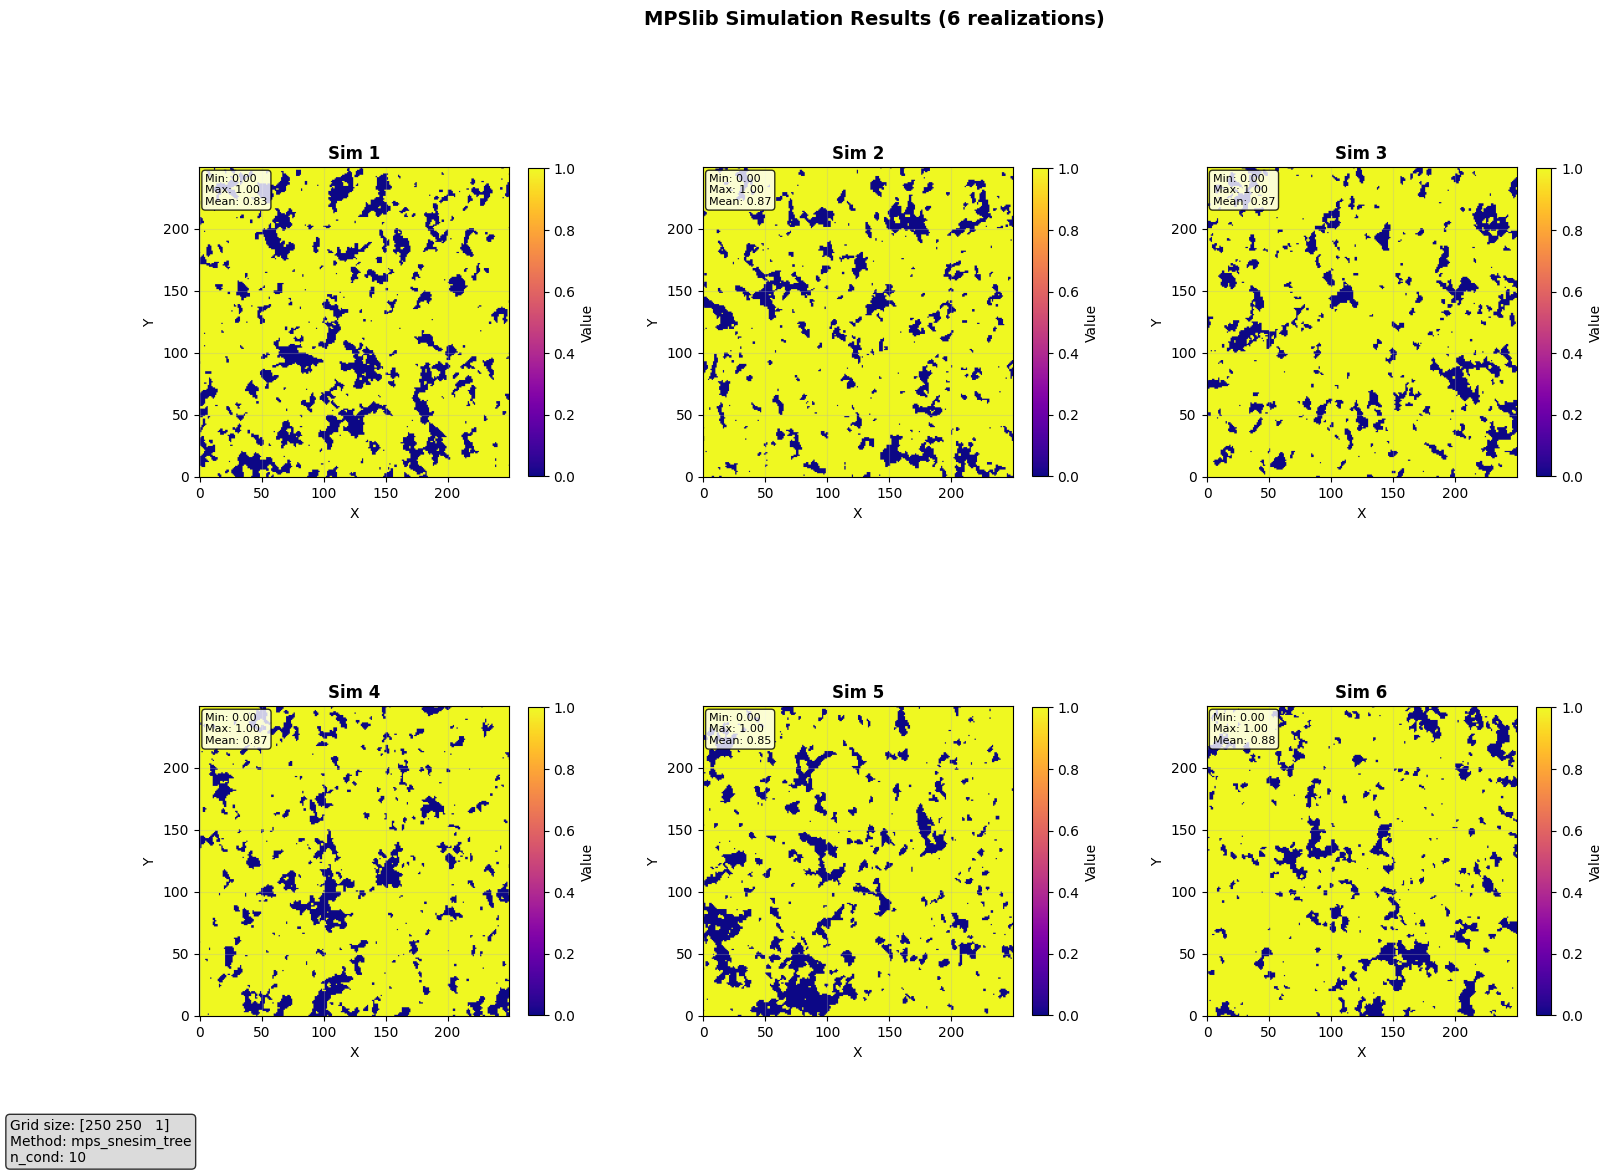

In [19]:
# Advanced usage
images = plot_realizations_enhanced(
    O, 
    n_realizations=6,           # Plot 6 realizations
    figsize=(18, 12),          # Larger figure
    cmap='plasma',             # Different colormap
    title_prefix="Sim",        # Custom title prefix
    save_path="results.png",   # Save the plot
    dpi=300                    # High resolution
)